In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

import copy
import math

In [3]:
# load the dataset
file = "data/data_contrast.txt"
x_train, y_train = load_data_multi(file)
devide = 109   #1059
x_tumor = x_train[0:devide, :]
x_normal = x_train[devide:, :]
y_tumor = y_train[0:devide]
y_normal = y_train[devide:]

x_header = load_data_header(file)
labels = ["tumor", "normal"]

#print(x_train)

In [34]:
# print x_tumor
print("Type of x_tumor:", type(x_tumor))
print("First five elements of x_tumor are:\n", x_tumor[:5])

# print x_normal
print("Type of x_normal:", type(x_normal))
print("First five elements of x_normal are:\n", x_normal[:5])

# print y_tumor
print("Type of y_tumor:", type(y_tumor))
print("Last five elements of y_tumor are:\n", y_tumor[-5:])

# print x_normal
print("Type of y_normal:", type(y_normal))
print("First five elements of y_normal are:\n", y_normal[:5])


print('The shape of x_tumor is:', x_tumor.shape)
print('The shape of x_normal is:', x_normal.shape)
print('The shape of y_tumor is: ', y_tumor.shape)
print('The shape of y_normal is: ', y_normal.shape)

print("Labels: ", labels)
print('Number of training examples (m):', len(x_train))
print()

Type of x_tumor: <class 'numpy.ndarray'>
First five elements of x_tumor are:
 [[0.17088312 0.36787291 0.77609418 0.72625327 0.69065262 0.38448702
  0.35956657]
 [0.45748046 0.         0.20234709 0.29340328 0.30857931 0.23775783
  0.29227823]
 [0.99336503 0.50963945 0.34551827 0.65264601 0.83500364 1.15748621
  0.42353975]
 [0.15393934 0.         0.         0.15393934 0.36560594 0.52724225
  0.7042725 ]
 [0.17199091 0.25798636 0.17199091 0.79115817 0.61630017 0.17199091
  0.5976684 ]]
Type of x_normal: <class 'numpy.ndarray'>
First five elements of x_normal are:
 [[0.         0.67430729 0.33283116 0.60514757 0.2982513  0.1988342
  0.86881901]
 [0.         0.         0.         0.         0.         0.
  0.76162592]
 [0.14769608 0.35077819 0.21415931 0.36185539 0.45785784 0.73848039
  0.25846814]]
Type of y_tumor: <class 'numpy.ndarray'>
Last five elements of y_tumor are:
 [5.17385114 5.14919625 6.04315002 3.20003349 4.93235497]
Type of y_normal: <class 'numpy.ndarray'>
First five elemen

range(1, 4)
range(0, 4)
range(1, 4)


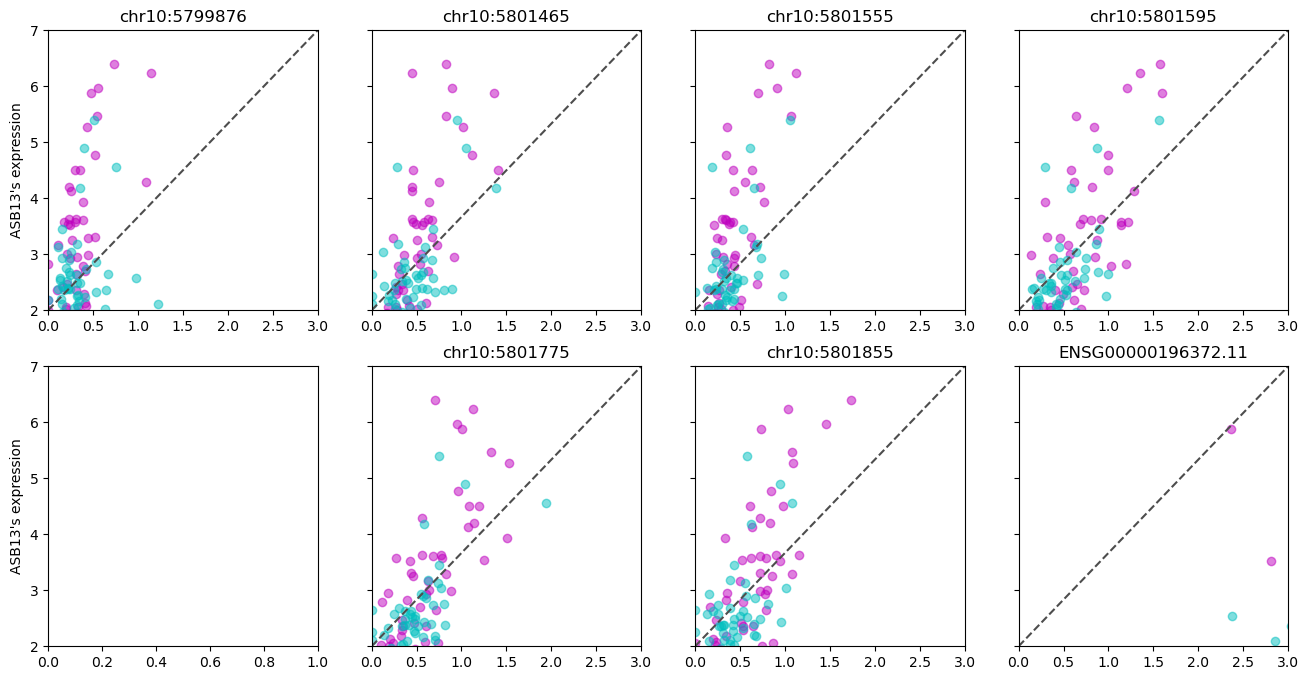

In [4]:
fig,ax=plt.subplots(2, 4, figsize=(16, 8), sharey=True)
print(range(len(ax[0]))[1:])
shift = 0
id = 0
for i in range(len(ax)):
    shift = i
    print(range(len(ax[0]))[shift:])
    for j in range(len(ax[0]))[shift:]:
        ax[i][j].set_xlim(0,3)
        ax[i][j].set_ylim(2,7)
        #print(i*len(ax[0])+j)
        ax[i][j].scatter(x_tumor[:,id], y_tumor, c="m", alpha=0.5, marker="o")
        ax[i][j].scatter(x_normal[:,id], y_normal,c="c", alpha=0.5, marker="o")

        ax[i][j].set_title(x_header[id])
        ax[i][j].plot(ax[i][j].get_xlim(), ax[i][j].get_ylim(), ls="--", c=".3")
        id+=1

#fig.legend(labels, loc = "left")
ax[0][0].set_ylabel("ASB13's expression")
ax[1][0].set_ylabel("ASB13's expression")

plt.show()

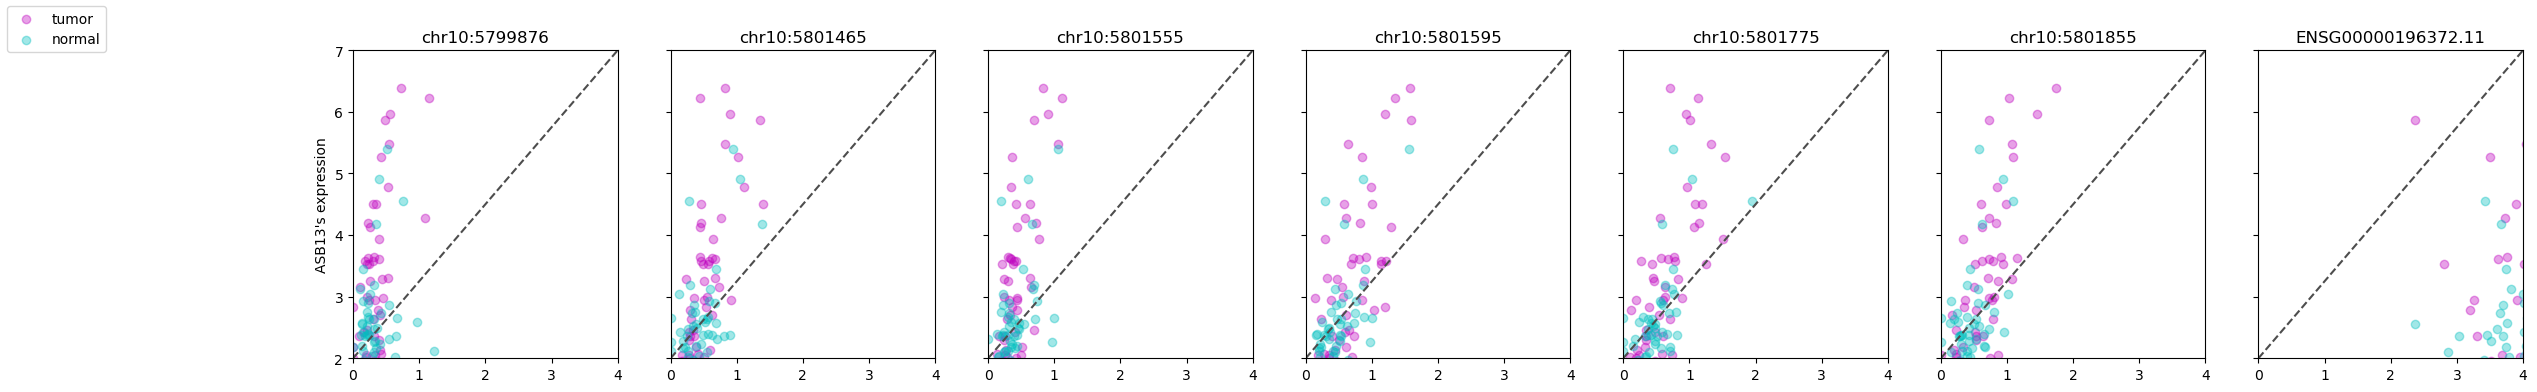

In [5]:
fig,ax=plt.subplots(1, 7, figsize=(28, 4), sharey=True)
for i in range(len(ax)):
    ax[i].set_xlim(0,4)
    ax[i].set_ylim(2,7)
    ax[i].scatter(x_tumor[:,i], y_tumor, c="m", alpha=0.37, marker="o")
    ax[i].scatter(x_normal[:,i], y_normal,c="c", alpha=0.37, marker="o")

    ax[i].set_title(x_header[i])
    ax[i].plot(ax[i].get_xlim(), ax[i].get_ylim(), ls="--", c=".3")

fig.legend(labels, loc = "upper left")
ax[0].set_ylabel("ASB13's expression")
plt.show()


range(1, 4)
range(0, 4)
range(1, 4)


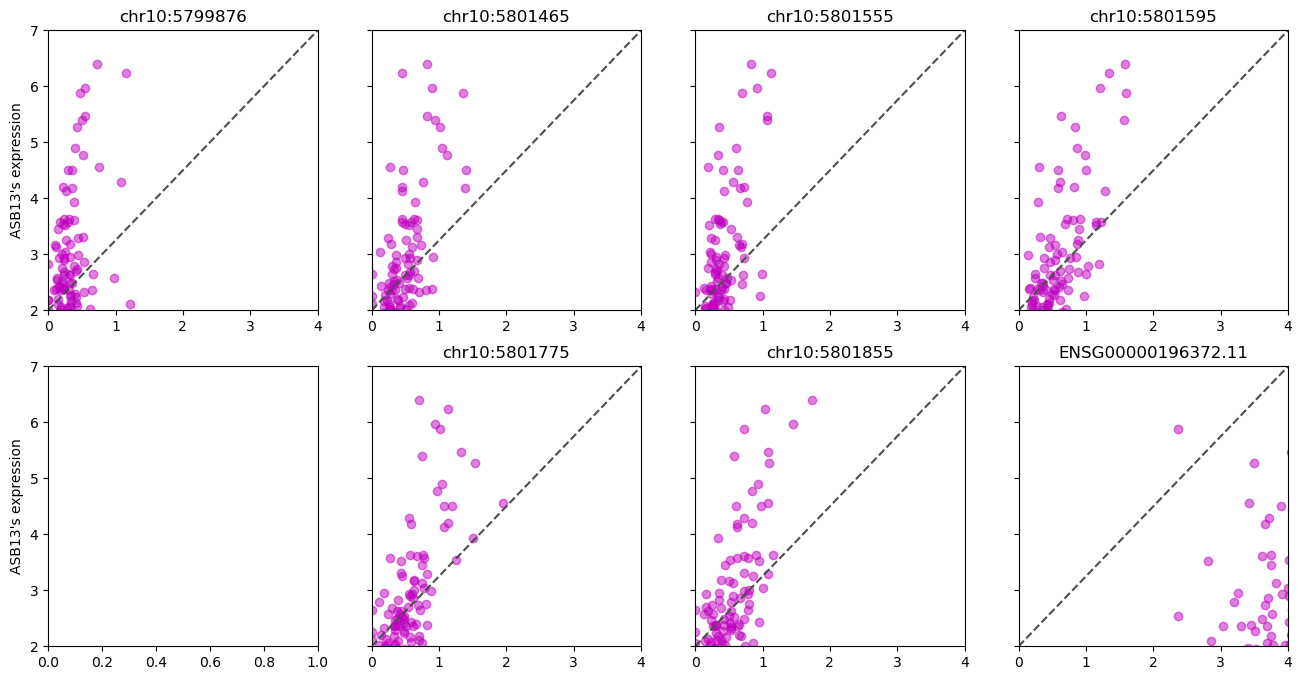

In [6]:
fig,ax=plt.subplots(2, 4, figsize=(16, 8), sharey=True)
print(range(len(ax[0]))[1:])
shift = 0
id = 0
for i in range(len(ax)):
    shift = i
    print(range(len(ax[0]))[shift:])
    for j in range(len(ax[0]))[shift:]:
        ax[i][j].set_xlim(0,4)
        ax[i][j].set_ylim(2,7)
        #print(i*len(ax[0])+j)
        ax[i][j].scatter(x_tumor[:,id], y_tumor, c="m", alpha=0.5, marker="o")
        ax[i][j].scatter(x_normal[:,id], y_normal,c="m", alpha=0.5, marker="o")

        ax[i][j].set_title(x_header[id])
        ax[i][j].plot(ax[i][j].get_xlim(), ax[i][j].get_ylim(), ls="--", c=".3")
        id+=1

#fig.legend(labels, loc = "left")
ax[0][0].set_ylabel("ASB13's expression")
ax[1][0].set_ylabel("ASB13's expression")

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

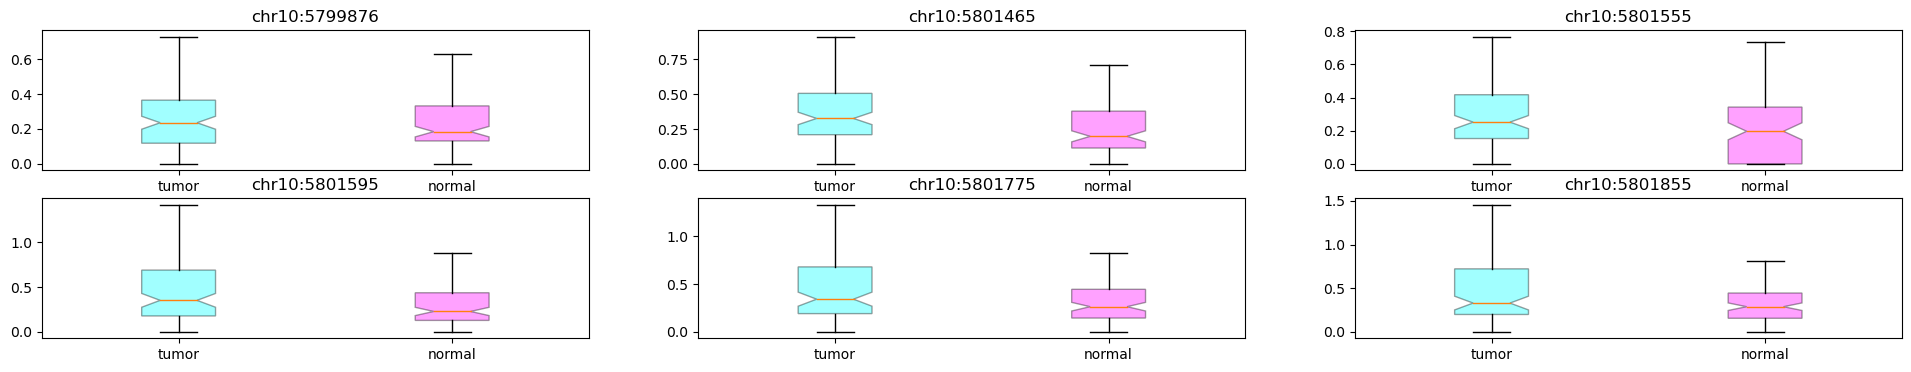

In [8]:
fig,ax=plt.subplots(2, 3, figsize=(24, 4))
colors = ['cyan', 'magenta']
for i in range(len(ax)):
    for j in range(len(ax[0])):
        box = ax[i][j].boxplot([x_tumor[:,i*len(ax[0])+j], x_normal[:,i*len(ax[0])+j]], showfliers=False, notch=True, widths=0.27, labels=labels, patch_artist = True)
        for patch, color in zip(box['boxes'], colors):
            patch.set(facecolor=color, alpha=0.37)
        ax[i][j].set_title(x_header[i*len(ax[0])+j], loc="center")

ax[0][0].set_ylabel("Enhancer expression")
ax[1][0].set_ylabel("Enhancer expression")

plt.show()


In [ ]:

fig,ax=plt.subplots(2, 4, figsize=(16, 8), sharey=True)
print(range(len(ax[0]))[1:])
shift = 0
id = 0
for i in range(len(ax)):
    shift = i
    print(range(len(ax[0]))[shift:])
    for j in range(len(ax[0]))[shift:]:
        ax[i][j].set_xlim(0,4)
        ax[i][j].set_ylim(2,7)
        #print(i*len(ax[0])+j)
        ax[i][j].scatter(x_tumor[:,id], y_tumor, c="m", alpha=0.5, marker="o")
        ax[i][j].scatter(x_normal[:,id], y_normal,c="m", alpha=0.5, marker="o")

        ax[i][j].set_title(x_header[id])
        ax[i][j].plot(ax[i][j].get_xlim(), ax[i][j].get_ylim(), ls="--", c=".3")
        id+=1

#fig.legend(labels, loc = "left")
ax[0][0].set_ylabel("ASB13's expression")
ax[1][0].set_ylabel("ASB13's expression")

plt.show()